# Twitter Colombia Strike

# Data Processing

In [39]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", 140)

In [40]:
try:
    import nltk
    print("Libreria: 'nltk' esta instalada y se cargo correctamente")
except ModuleNotFoundError:
    print("Libreria: 'nltk' no esta instalada, se debe instalar")
    !pip install nltk
    import nltk


Libreria: 'nltk' esta instalada y se cargo correctamente


In [41]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download es_core_news_lg
!pip install contractions
!pip install emoji
!pip install emot
!pip install seaborn
 
!python -m spacy download en_core_web_sm
!python -m textblob.download_corpora

     |████████████████████████████████| 568.4 MB 14 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
     |████████████████████████████████| 13.6 MB 81 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_

In [42]:
from nltk.text import Text
from nltk.tokenize import word_tokenize,sent_tokenize
import collections
import matplotlib.pyplot as plt
import seaborn as sbn
#import DeepMoji
import string
from wordcloud import WordCloud
nltk.download('stopwords')
import seaborn as sns 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing dataset

In [44]:
df = pd.read_csv('/content/drive/MyDrive/Data/Corrected_Final_All.csv')

df.shape

(22160, 38)

In [45]:
df_spanish = df[(df.lang == 'es')]# Slicing by language: Spanish

In [46]:
df_english = df[(df.lang == 'en')]# Slicing by language: English
 

In [47]:
data = pd.DataFrame(df_english.preprocessed_data)

1. Cleaning tweets

In [48]:
#Cleaning & tokenize the text in words.

def clean_tokenize(text):

    # Text to lowercase
    new_text = text.lower()
    # Remove web pages ("http")
    new_text = re.sub('http\S+', ' ', new_text)
    # Remove punctuation marks
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    new_text = re.sub(regex , ' ', new_text)
    # Remove numbers
    new_text = re.sub("\d+", ' ', new_text)
    # Remove white spaces
    new_text = re.sub("\\s+", ' ', new_text)
    # Tokenize by words
    new_text = new_text.split(sep = ' ')
    # Remove tokens lenght < 2
    new_text = [token for token in new_text if len(token) > 1]
    
    return(new_text)

In [49]:
data['tweets_clean'] = data['preprocessed_data'].apply(lambda x: clean_tokenize(x))
#data[['preprocessed_data', 'tweets_clean']].head()

2. Unnest the data

In [50]:
#Unnest clean tweets
# ==============================================================================
tweets_tidy = data.explode(column='tweets_clean')
tweets_tidy = data.rename(columns={'tweets_clean':'token'})
 

3. Remove Stopwords

In [51]:
#Stopwords 
english_stops = set( nltk.corpus.stopwords.words('english'))
english_stops.update(['token', 'dtype', 'Name', 'object', 'Length', 'the', 'is', 'to', 'and'])

In [52]:
#Remove stopwords
#tweets_tidy = tweets_tidy[~(tweets_tidy["token"].isin(english_stops))]

4. Preprocessing before to plot

In [53]:
all_words = list([a for b in tweets_tidy.token.tolist() for a in b])#Making the list needed for counting and ploting


In [54]:
w = collections.Counter(all_words)
new_df = pd.DataFrame.from_dict(w, orient= 'index').reset_index()
new_df.columns = ['Words', 'counts']
new_df = new_df.sort_values('counts', ascending = False)

## English Tweets

In [55]:
plt.rcParams["figure.figsize"] = (20,6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'English tweets')

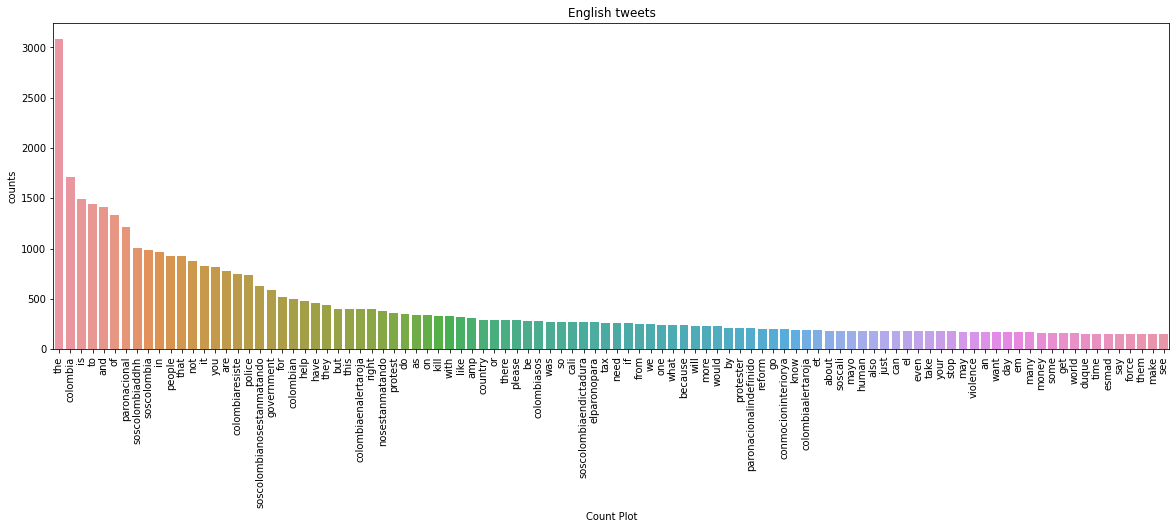

In [56]:
ax = sns.barplot(new_df.Words[:100], new_df.counts[:100])
plt.xticks(rotation = 90)
ax.set_xlabel("Count Plot")
ax.set_title('English tweets')

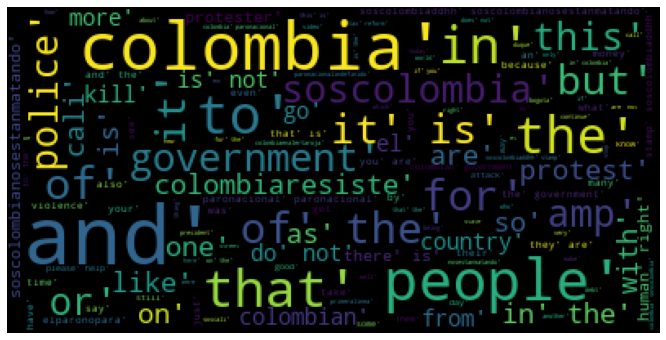

In [57]:
s = str(all_words)
wordcloud = WordCloud(max_font_size=50, stopwords = english_stops).generate(s)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Spanish Tweets

In [58]:
data_es = pd.DataFrame(df_spanish.preprocessed_data)

1. Cleaning tweets

In [59]:
#Cleaning & tokenize the text in words.

def clean_tokenize(text):

    # Text to lowercase
    new_text = text.lower()
    # Remove web pages ("http")
    new_text = re.sub('http\S+', ' ', new_text)
    # Remove punctuation marks
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    new_text = re.sub(regex , ' ', new_text)
    # Remove numbers
    new_text = re.sub("\d+", ' ', new_text)
    # Remove white spaces
    new_text = re.sub("\\s+", ' ', new_text)
    # Tokenize by words
    new_text = new_text.split(sep = ' ')
    # Remove tokens lenght < 2
    new_text = [token for token in new_text if len(token) > 1]
    
    return(new_text)

In [60]:
data_es['tweets_clean'] = data_es['preprocessed_data'].apply(lambda x: clean_tokenize(x))

2. Unnest the data

In [61]:
#Unnest clean tweets
# ==============================================================================
tweets_tidy_es = data_es.explode(column='tweets_clean')
tweets_tidy_es = data_es.rename(columns={'tweets_clean':'token'})
 

3. Remove Stopwords

In [62]:
#Stopwords 
spanish_stops = set( nltk.corpus.stopwords.words('spanish'))
spanish_stops.update(['solo'])

In [63]:
#Remove stopwords
#tweets_tidy_es = tweets_tidy_es[~(tweets_tidy_es["token"].isin(spanish_stops))]

4.  Preprocessing before to plot

In [64]:
all_words = list([a for b in tweets_tidy_es.token.tolist() for a in b])#Making the list needed for counting and ploting
w = collections.Counter(all_words)
new_df = pd.DataFrame.from_dict(w, orient= 'index').reset_index()
new_df.columns = ['Words', 'counts']
new_df = new_df.sort_values('counts', ascending = False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Spanish tweets')

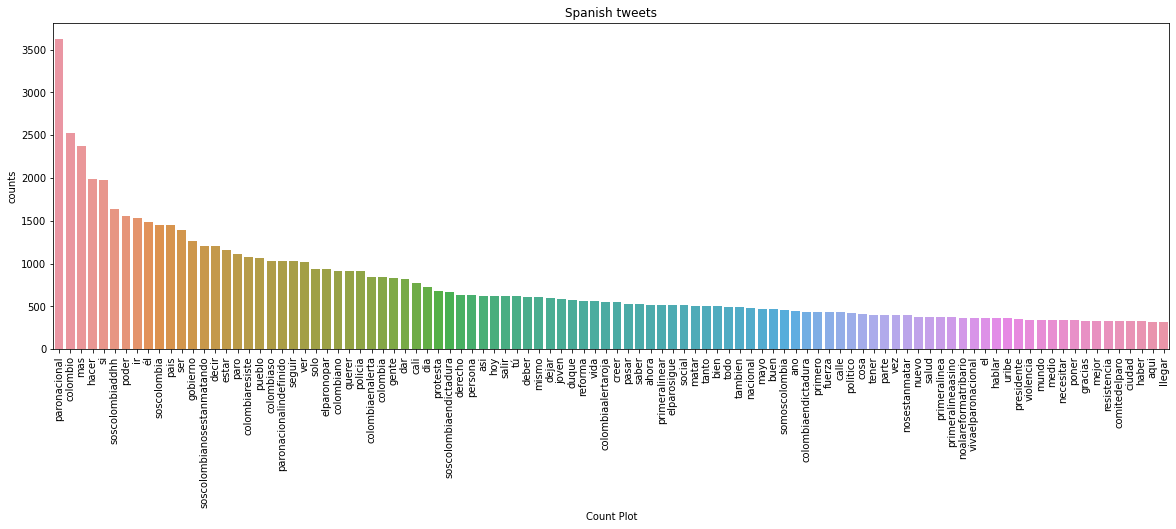

In [65]:
ax = sns.barplot(new_df.Words[:100], new_df.counts[:100])
plt.xticks(rotation = 90)
ax.set_xlabel("Count Plot")
ax.set_title('Spanish tweets')

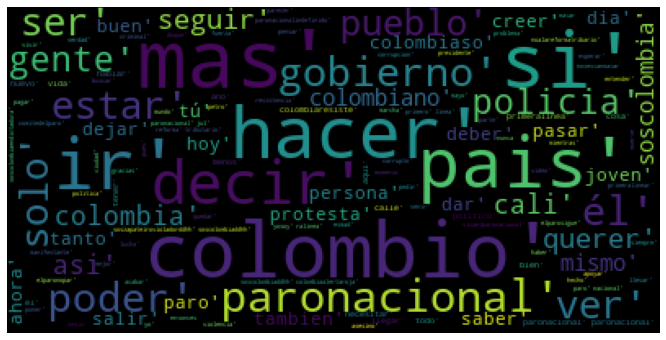

In [66]:
s2 = str(all_words)
wordcloud = WordCloud(max_font_size=50, stopwords = spanish_stops).generate(s2)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()